# Notes
* try multiple blocks 3,5,6,7
* try cross validation
* try bagging samples.
* try one month at a time
* try one day at a time.
For LA sanfrancisco

For NYC- Manhattan

* Try hierarchical learning. 

In [1]:
from lib import gradient_mixed
from lib import visualize
from lib import mixmem_aux

import pandas as pd
import math
import random
import numpy as np
import scipy as scp
import scipy.stats as stats
import matplotlib.pyplot as plt

gradient_descent = gradient_mixed.gradient_descent
realistic_initial = gradient_mixed.realistic_initial
likelihood = mixmem_aux.likelihood
mu_likelihood = mixmem_aux.mu_likelihood

scatterplot_city = visualize.scatterplot_city
block_omegas = visualize.block_omegas


In [19]:
LAdf = pd.read_csv("../data/cleaned/LA16_cleaned_final_no_weekend.csv")
LA_stations_dups = list(LAdf['start_station_id'])
LA_lat = list(LAdf['start_lat'])
LA_lon = list(LAdf['start_lon'])
LA_station_info = dict(zip(LA_stations_dups, zip(LA_lat, LA_lon)))
LA_stations = list(set(LA_stations_dups))
LA_stations.sort()
LA_N = len(LA_stations)
LA_matrix = np.zeros([LA_N, LA_N, 24])
for index, row in LAdf.iterrows():
    i = LA_stations.index(row['start_station_id'])
    j = LA_stations.index(row['end_station_id'])
    t = int(row['start_time'].split(':')[0].split(' ')[1])
    LA_matrix[i, j, t] += 1

In [4]:
NYdf = pd.read_csv("../data/cleaned/ny1610_hm_no_weekend.csv")
NY_stations_dups = list(NYdf['Start.Station.ID'])
NY_lat = list(NYdf['Start.Station.Longitude'])
NY_lon = list(NYdf['Start.Station.Latitude'])
NY_station_info = dict(zip(NY_stations_dups, zip(NY_lat, NY_lon)))
NY_stations = list(set(NY_stations_dups))
NY_stations.sort()
NY_N = len(NY_stations)
NY_matrix = np.zeros([NY_N, NY_N, 24])
for index, row in NYdf.iterrows():
    #if ~row['weekend']:
    i = NY_stations.index(row['Start.Station.ID'])
    j = NY_stations.index(row['End.Station.ID'])
    t = int(row['Start.Time'].split(':')[0].split(' ')[1])
    NY_matrix[i, j, t] += 1

   # Distance histograms

In [57]:
LAdf['start_lat2']=LAdf['start_lat']*np.pi/180
LAdf['start_lon2']=LAdf['start_lon']*np.pi/180
LAdf['end_lat2']=LAdf['end_lat']*np.pi/180
LAdf['end_lon2']=LAdf['end_lon']*np.pi/180
LA_dlat=LAdf['start_lat2']-LAdf['end_lat2']
LA_dlon=LAdf['start_lat2']-LAdf['end_lat2']



In [59]:
a=np.sin(LA_dlat/2).apply(lambda x: x**2)+\
np.cos(LAdf['start_lat2'])*np.cos(LAdf['end_lat2'])*\
np.sin(LA_dlon/2).apply(lambda x: x**2)
c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
R=6371
LA_distances=R*c


Text(0.5, 1.0, 'Los Angeles trip distances')

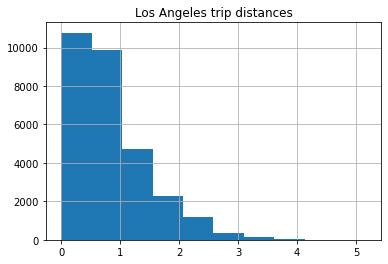

In [65]:
LA_distances.hist()
plt.title('Los Angeles trip distances')

Text(0.5, 1.0, 'Manhattan trip distances')

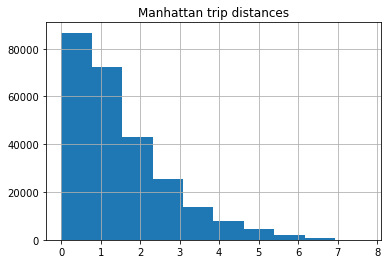

In [66]:
NYdf['start_lat2']=NYdf['Start.Station.Latitude']*np.pi/180
NYdf['start_lon2']=NYdf['Start.Station.Longitude']*np.pi/180
NYdf['end_lat2']=NYdf['End.Station.Latitude']*np.pi/180
NYdf['end_lon2']=NYdf['End.Station.Longitude']*np.pi/180
NY_dlat=NYdf['start_lat2']-NYdf['end_lat2']
NY_dlon=NYdf['start_lat2']-NYdf['end_lat2']
a=np.sin(NY_dlat/2).apply(lambda x: x**2)+\
np.cos(NYdf['start_lat2'])*np.cos(NYdf['end_lat2'])*\
np.sin(NY_dlon/2).apply(lambda x: x**2)
c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
R=6371
NY_distances=R*c
NY_distances.hist()
plt.title('Manhattan trip distances')

,tripduration,Start.Time,Stop.Time,Start.Station.ID,Start.Station.Name,Start.Station.Latitude,Start.Station.Longitude,End.Station.ID,End.Station.Name,End.Station.Latitude,End.Station.Longitude,Bike.ID,User.Type,Birth.Year,Gender,count,hour,dayofweek,weekend
0,48.82,2016-10-03 00:00:11,2016-10-03 00:49:00,520,W 52 St & 5 Ave,40.759923,-73.976485,524,W 43 St & 6 Ave,40.755273,-73.983169,20684,Customer,NaN,0,1,0,1,False
1,13.43,2016-10-03 00:01:37,2016-10-03 00:15:03,477,W 41 St & 8 Ave,40.756405,-73.990026,3172,W 74 St & Columbus Ave,40.778567,-73.977550,17136,Subscriber,1988.0,2,1,0,1,False
2,7.72,2016-10-03 00:02:09,2016-10-03 00:09:52,423,W 54 St & 9 Ave,40.765849,-73.986905,490,8 Ave & W 33 St,40.751551,-73.993934,18888,Subscriber,1987.0,1,1,0,1,False
3,2.73,2016-10-03 00:02:39,2016-10-03 00:05:23,423,W 54 St & 9 Ave,40.765849,-73.986905,500,Broadway & W 51 St,40.762288,-73.983362,19398,Customer,NaN,0,1,0,1,False
4,7.55,2016-10-03 00:02:39,2016-10-03 00:10:13,447,8 Ave & W 52 St,40.763707,-73.985162,3159,W 67 St & Broadway,40.774925,-73.982666,27021,Subscriber,1982.0,1,1,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256835,21.92,2016-10-31 23:50:10,2016-11-01 00:12:06,3164,Columbus Ave & W 72 St,40.777057,-73.978985,3290,E 89 St & York Ave,40.777945,-73.946041,17567,Subscriber,1962.0,1,1,23,1,False
256836,2.17,2016-10-31 23:50:58,2016-10-31 23:53:08,3134,3 Ave & E 62 St,40.763126,-73.965269,3132,E 59 St & Madison Ave,40.763505,-73.971092,21568,Subscriber,1984.0,1,1,23,1,False
256837,7.75,2016-10-31 23:53:32,2016-11-01 00:01:18,3147,E 85 St & 3 Ave,40.778012,-73.954071,3145,E 84 St & Park Ave,40.778627,-73.957721,27266,Subscriber,1983.0,1,1,23,1,False
256838,3.07,2016-10-31 23:53:33,2016-10-31 23:56:37,3301,Columbus Ave & W 95 St,40.791956,-73.968087,3341,Central Park West & W 102 St,40.795346,-73.961860,24943,Subscriber,1987.0,1,1,23,1,False
